In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv


In [10]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Train test split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv('/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv')

In [13]:
data.head()

product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral

In [14]:
data.shape

(205052, 6)

In [15]:
data.drop(columns=['product_name','product_price','Rate'],inplace=True)

In [16]:
data.head()

Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral

In [17]:
data.iloc[300:350]

Review                                            Summary  \
300              very good                                               good   
301   good quality product                                      yup satisfied   
302           does the job                          air flow is not that good   
303                   nice                   no stand and little noisy cooler   
304        worth the money                                  very nice product   
305        worth the money  good onebut still sounds generated by cooler a...   
306       perfect product!  nice product thanks to flipkart for early deli...   
307        value-for-money                     nice product with decent price   
308            pretty good          prompt delivery satisfied value for money   
309              excellent                                 its awesome cooler   
310    best in the market!                                               good   
311               not good  good product but the only drawback is to clean...   
312              excellent  excellent product water consumption is good if...   
313                 super!                  best cooler heavy duty stong body   
314       perfect product!                                       good product   
315             delightful  product is very good quality of product is als...   
316               moderate                                        not cooling   
317              very poor     no expected speed and not cooling this product   
318               horrible  there are no wheels to move coolerits very har...   
319       perfect product!  have one or two very small negligible issues o...   
320                 super!              fantastic coolar nice cooling like ac   
321      worth every penny             nice product cooling and speed is good   
322              fabulous!                                               good   
323              wonderful  nice cooling nice products but body isnt prope...   
324    best in the market!                        superb cooler in this price   
325              wonderful                                            awesome   
326      absolute rubbish!  please dont buy this productafter 1 month fan ...   
327  mind-blowing purchase                        nice cooler cooling awesome   
328           nice product                                  very nice product   
329         simply awesome                                      super cooling   
330            really nice                                  excellent product   
331             delightful                                      nice prodouct   
332                 super!                               excellent air cooler   
333            really nice     overall very goodbut warranty card 3 month ago   
334              wonderful  good air cooler value for money sound is very ...   
335    best in the market!                            super very good product   
336      terrific purchase                             nice one no need of ac   
337              fabulous!  fantastic cooler in this range chilled more th...   
338              fabulous!                                               good   
339             delightful                                       simple super   
340              excellent                                       good product   
341      worth every penny  working great three side cooling pad has incre...   
342              brilliant  awesome product if possible pls provide wheel ...   
343      terrific purchase  good product the only draw back is there is no...   
344              just okay            unable to open to change water or grass   
345              excellent  nice product with good blower and fast cooling...   
346               horrible                                   dont buy any one   
347            bad quality  built quality is good but fan is not much powe...   
348              excellent        this is best air 

In [18]:
data["Reviews"]=data['Review']+" " +data['Summary']

In [19]:
data.head()

Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment                                            Reviews  
0  positive  super! great cooler excellent air flow and for...  
1  positive      awesome best budget 2 fit cooler nice cooling  
2  positive  fair the quality is good but the power of air ...  
3  negative  useless product very bad product its a only a fan  
4   neutral                                 fair ok ok product

In [20]:
data.drop(columns=['Review','Summary'],inplace=True)

In [21]:
data.head()

Sentiment                                            Reviews
0  positive  super! great cooler excellent air flow and for...
1  positive      awesome best budget 2 fit cooler nice cooling
2  positive  fair the quality is good but the power of air ...
3  negative  useless product very bad product its a only a fan
4   neutral                                 fair ok ok product

In [22]:
data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [23]:
data['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x796627bb4370>,
 [Text(-0.9975209066021538, 0.6670472553662278, 'Positive'),
  Text(0.8810604089146189, -0.8146978310043577, 'Negetive'),
  Text(1.1852651193004233, -0.18747425681877994, 'Neutral')],
 [Text(-0.581887195517923, 0.3891108989636329, '81.2%'),
  Text(0.5139519052001943, -0.47524040141920865, '13.8%'),
  Text(0.6914046529252468, -0.1093599831442883, '5.0%')])

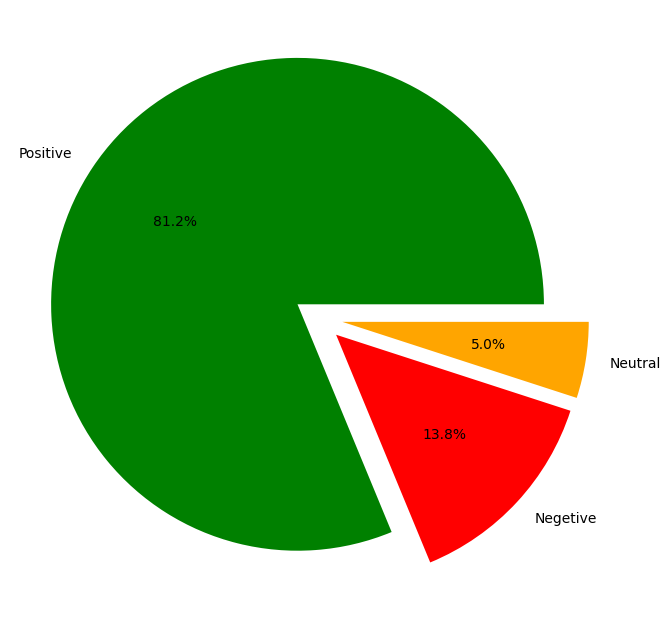

In [24]:
# Class Distribution

plt.figure(figsize=(11, 8))
labels = ['Positive','Negetive', 'Neutral']
explode = [.1, .1,.1]
mycolors = ['green', 'Red','Orange']
sizes = data['Sentiment'].value_counts().values

plt.pie(x = sizes, explode = explode, labels = labels, colors = mycolors, autopct = "%1.1f%%")

In [25]:
data['Reviews'] = data['Reviews'].apply(str)

In [26]:
data['text_length'] = data['Reviews'].apply(len)

In [27]:
data.head()

Sentiment                                            Reviews  text_length
0  positive  super! great cooler excellent air flow and for...          101
1  positive      awesome best budget 2 fit cooler nice cooling           45
2  positive  fair the quality is good but the power of air ...           55
3  negative  useless product very bad product its a only a fan           49
4   neutral                                 fair ok ok product           18

In [28]:
pos_review = data[data.Sentiment == 'positive'].Reviews
neg_review = data[data.Sentiment == 'negative'].Reviews
neu_review = data[data.Sentiment == 'neutral'].Reviews

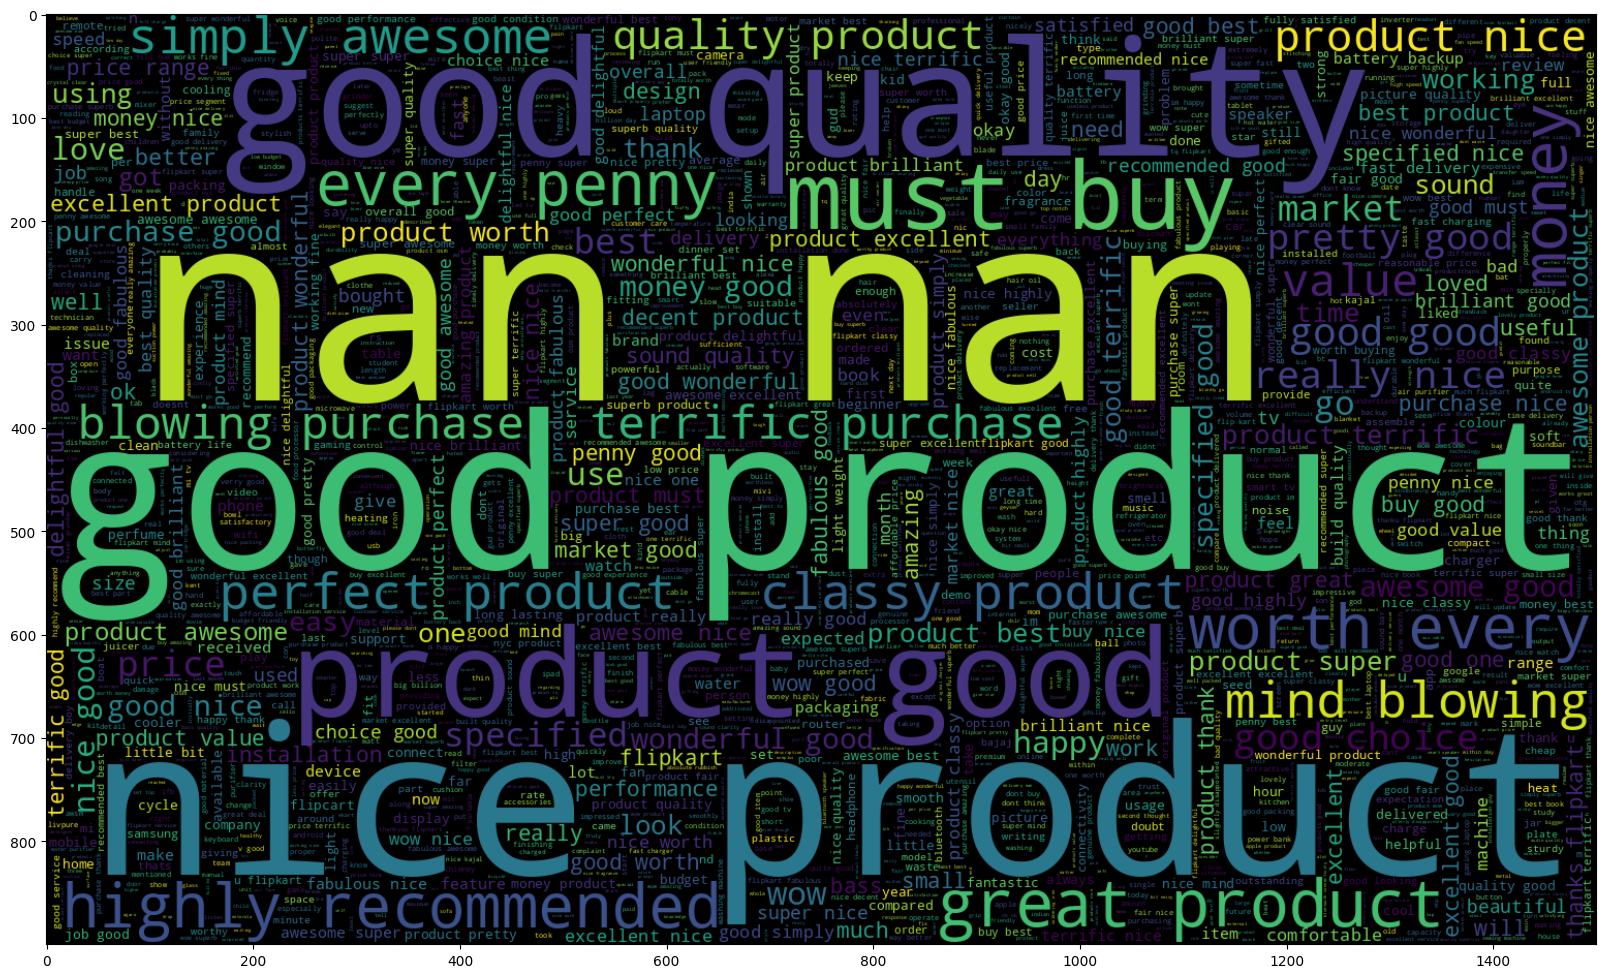

In [29]:
#word cloud for positive reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(pos_review))
plt.imshow(wc, interpolation='bilinear')

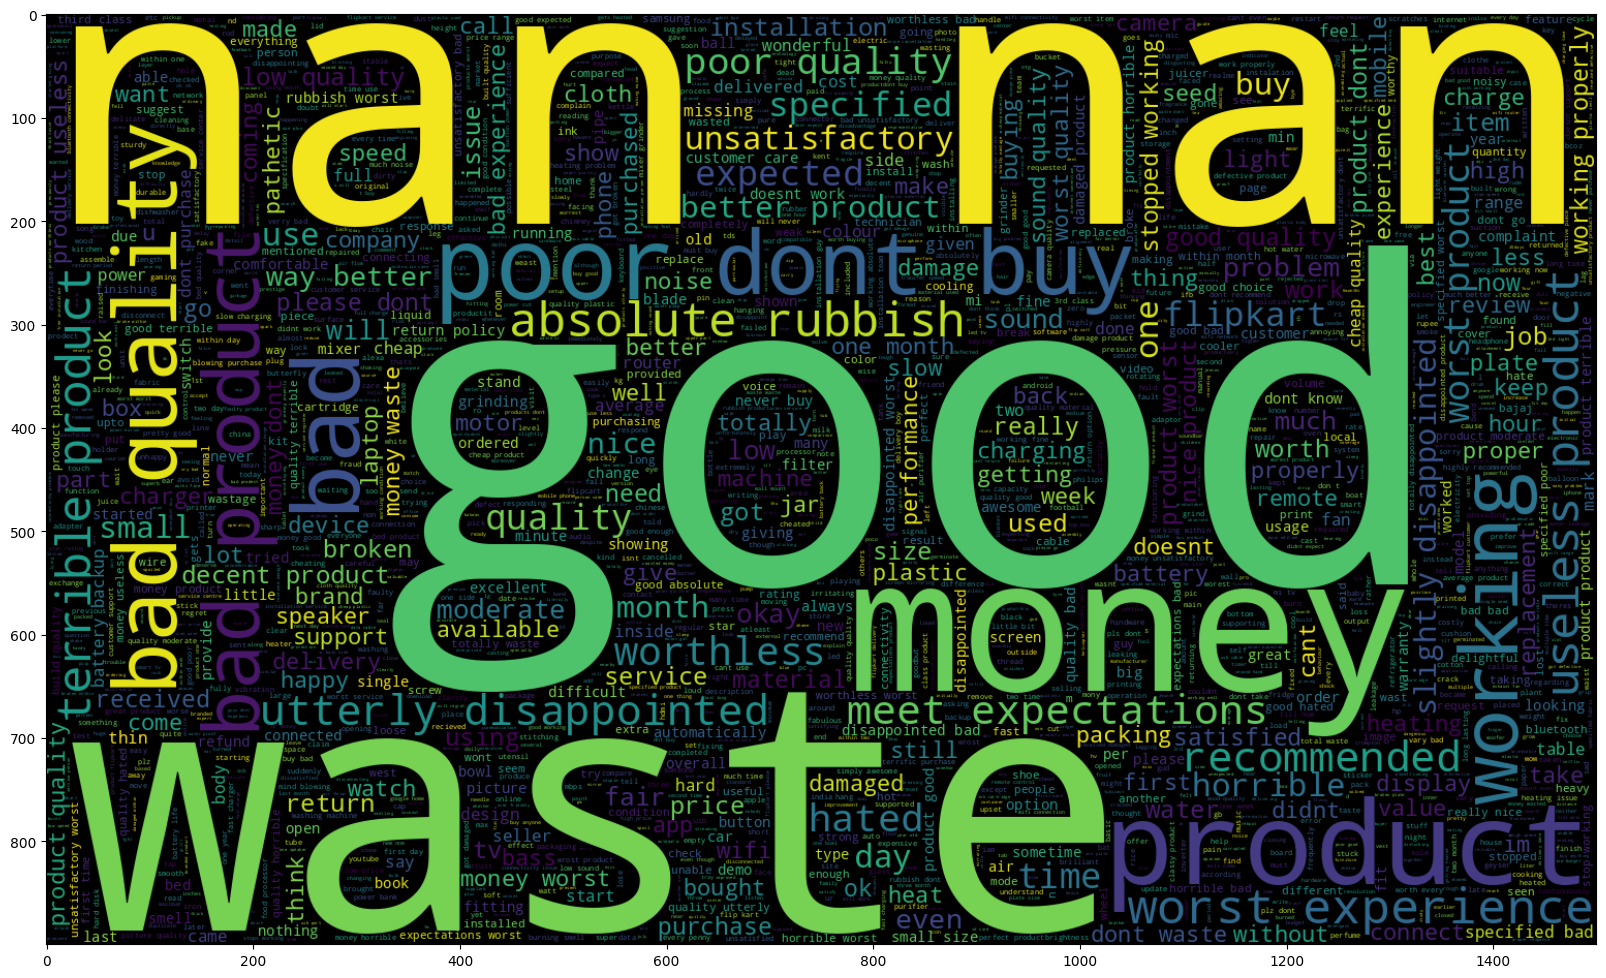

In [30]:
#word cloud for negetive reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(neg_review))
plt.imshow(wc, interpolation='bilinear')

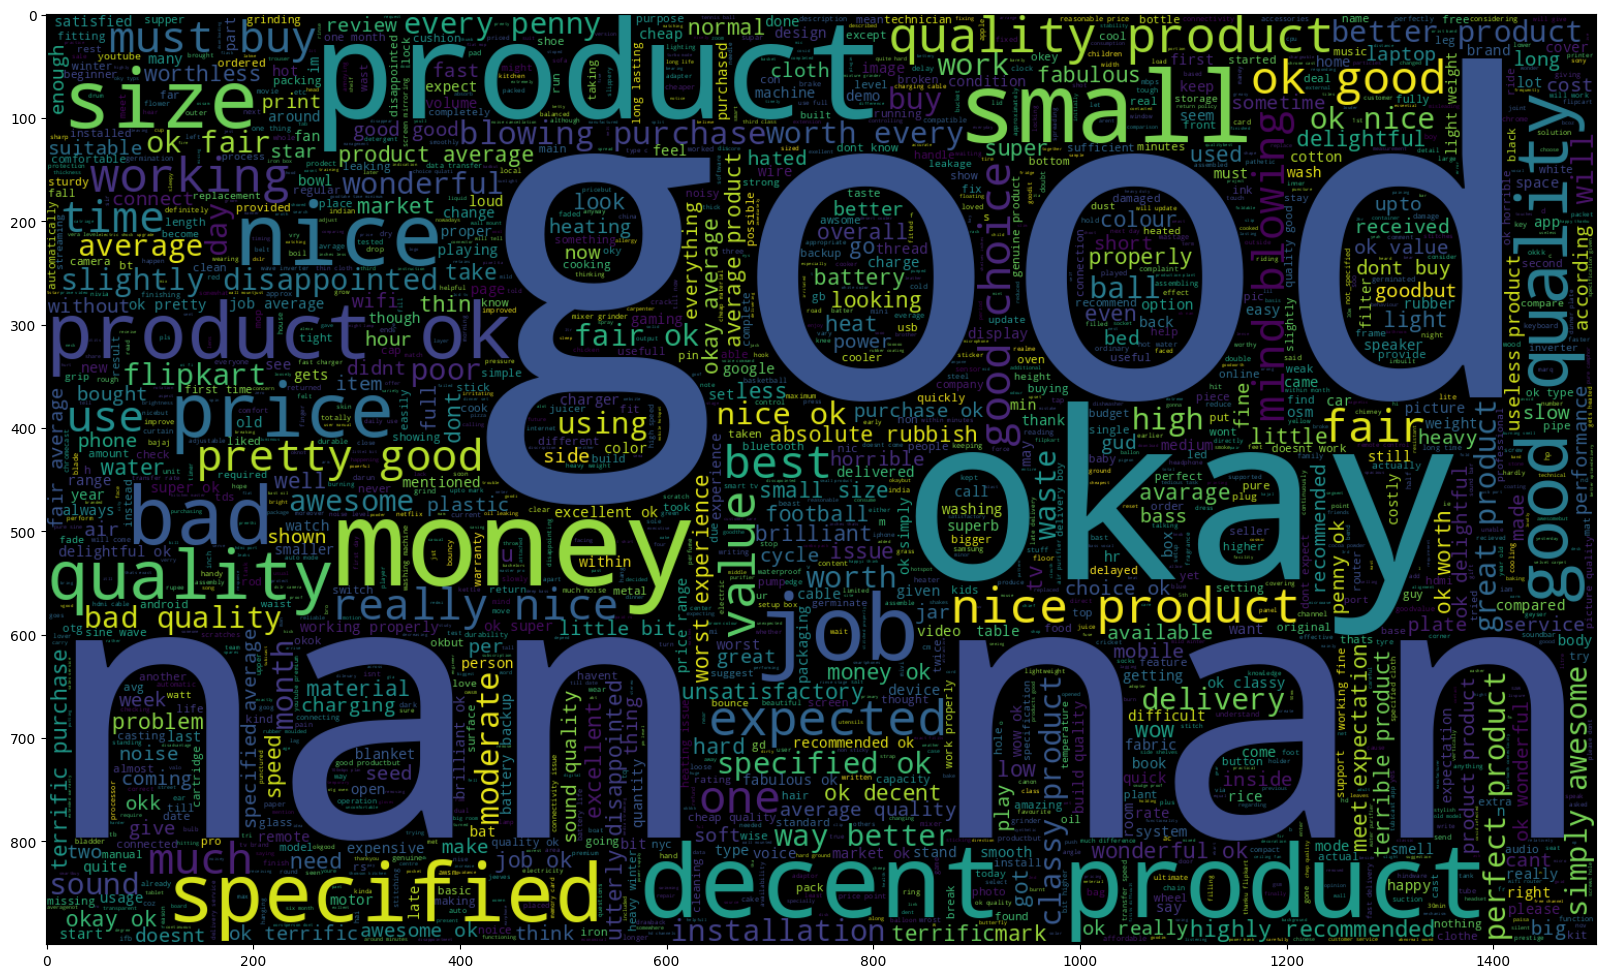

In [31]:
#word cloud for neutral reviews
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(neu_review))
plt.imshow(wc, interpolation='bilinear')

In [32]:
data['text_length'].describe()

count    205052.000000
mean         51.921040
std          72.986422
min           3.000000
25%          18.000000
50%          28.000000
75%          52.000000
max         616.000000
Name: text_length, dtype: float64

In [33]:
data['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [34]:
rep = {'positive':0,'negative':1,'neutral':2}

In [35]:
data['Classify']=data['Sentiment'].map(rep)

In [36]:
data.head()

Sentiment                                            Reviews  text_length  \
0  positive  super! great cooler excellent air flow and for...          101   
1  positive      awesome best budget 2 fit cooler nice cooling           45   
2  positive  fair the quality is good but the power of air ...           55   
3  negative  useless product very bad product its a only a fan           49   
4   neutral                                 fair ok ok product           18   

   Classify  
0         0  
1         0  
2         0  
3         1  
4         2

In [37]:
X = data['Reviews']
y = data['Classify']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(max_features = 2500)

In [39]:
X = cv.fit_transform(data['Reviews']).toarray()
y = data['Classify']

In [40]:
X = pd.DataFrame(X)
X

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0          0     0     0     0     0     0     0     0     0     0  ...     0   
1          0     0     0     0     0     0     0     0     0     0  ...     0   
2          0     0     0     0     0     0     0     0     0     0  ...     0   
3          0     0     0     0     0     0     0     0     0     0  ...     0   
4          0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
205047     0     0     0     0     0     0     0     0     0     0  ...     0   
205048     0     0     0     0     0     0     0     0     0     0  ...     0   
205049     0     0     0     0     0     0     0     0     0     0  ...     0   
205050     0     0     0     0     0     0     0     0     0     0  ...     0   
205051     0     0     0     0     0     0     0     0     0     0  ...     0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
0          0     0     0     0     0     0     0     0     0  
1          0     0     0     0     0     0     0     0     0  
2          0     0     0     0     0     0     0     0     0  
3          0     0     0     0     0     0     0     0     0  
4          0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
205047     0     0     0     0     0     0     0     0     0  
205048     0     0     0     0     0     0     0     0     0  
205049     0     0     0     0     0     0     0     0     0  
205050     0     0     0     0     0     0     0     0     0  
205051     0     0     0     0     0     0     0     0     0  

[205052 rows x 2500 columns]

In [42]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 24)

In [46]:
X_sm, y_sm = sm.fit_resample(X, y)

In [49]:
## Data Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 32)

In [57]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [58]:
# Fit the data

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# Make a prediction

y_pred = dt.predict(X_test)

In [61]:
y_pred

array([1, 1, 2, ..., 0, 1, 2])

In [62]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [64]:
print("Acuuracy Score",accuracy_score(y_test, y_pred))

Acuuracy Score 0.8289127455002051


In [66]:
print("F1 Score",f1_score(y_test, y_pred,average='weighted'))

F1 Score 0.8318368630114154


In [67]:
tf = TfidfVectorizer(max_features=2500)

X1 = tf.fit_transform(data['Reviews']).toarray()
y1 = data['Classify']

In [68]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X1 = pd.DataFrame(X1)
X1

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
205047   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
205048   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
205049   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
205050   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
205051   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

        2491  2492  2493  2494  2495  2496  2497  2498  2499  
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
205047   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
205048   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
205049   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
205050   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
205051   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[205052 rows x 2500 columns]

In [71]:
# Balancing

x_sm, y_sm = sm.fit_resample(X1, y1)

In [72]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 32)

In [73]:
X_train.shape, y_train.shape

((399794, 2500), (399794,))

In [74]:
# Model1

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
# Prediction

y_pred_tf1 = clf1.predict(X_test)

In [76]:
# Report

print(classification_report(y_test, y_pred_tf1))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     33568
           1       0.94      0.82      0.88     33084
           2       0.74      0.94      0.83     33297

    accuracy                           0.86     99949
   macro avg       0.88      0.86      0.86     99949
weighted avg       0.88      0.86      0.86     99949



In [128]:

input_text= ['amazing']
input_data_features = tf.transform(input_text)
data_features = pd.DataFrame(input_data_features.toarray())

# Making Prediction
prediction = clf1.predict(data_features)
print(prediction)


if (prediction[0]==0):
    print("Positive")
elif (prediction[0]==1):
    print("Negtive")

else:
    print("Neutral")

[0]
Positive


In [130]:
# saving the model
import pickle
pickle_out = open("Sentiment_analysis_flipkart.pkl", mode = "wb")
pickle.dump(clf1, pickle_out)
pickle_out.close()

In [79]:
data['Reviews'][0]

'super! great cooler excellent air flow and for this price its so amazing and unbelievablejust love it'